# Práctica 4 #  
Grupo: Tralalelo Tralala  
Integrantes: Yuriy Chaban Markevych, Pablo García Fernández, Alejandro Rodríguez Giner y Alonso Campillo Martínez  

# Introducción  
Aquí explicamos el trabajo y la motivación por hacerlo


Como dataset se ha escogido uno que determina si se concede o no un préstamo en casos basados en la India

# Dataset  
Explicamos el dataset elegido, las columnas que vamos a usar y hacemos la limpieza de los datos (previo análisis). Vamos a tratar todos los campos del dataframe como strings. Si en algún futuro necesitamos tratar los datos como números, simplemente los convertiremos.

In [58]:
import sklearn as skl
import pandas as pd
import numpy as np

_prestamos = pd.read_csv('dataset.csv')


Ahora vamos a mostrar los 4 primeros y los 4 últimos para asegurar que funciona el dataset a la perfección.

In [59]:
display(_prestamos.head(n=4))
display(_prestamos.tail(n=4))
print(_prestamos.columns.tolist())

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


['loan_id', ' no_of_dependents', ' education', ' self_employed', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value', ' loan_status']


Limpiamos el dataframe para que no tengamos problemas con las claves y las columnas en el futuro, concretamente quitando los espacios en blanco 
y quitando el loan_id (ya que es un dato innecesario para la predicción del modelo).

In [60]:
_prestamos.columns = _prestamos.columns.str.strip()
_prestamos = _prestamos.applymap(lambda x: x.strip() if isinstance(x, str) else x)
display(_prestamos.head(n=1))

columnas= ["no_of_dependents", "education", "self_employed", "income_annum", "loan_amount", "loan_term", "cibil_score", "residential_assets_value", "commercial_assets_value","luxury_assets_value","bank_asset_value","loan_status"] 
_prestamos= _prestamos[columnas]

display(_prestamos)

C:\Users\alons\AppData\Local\Temp\ipykernel_10872\2221218118.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  _prestamos = _prestamos.applymap(lambda x: x.strip() if isinstance(x, str) else x)


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved


,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


Aplicamos ahora One Hot Encoder a los atributos categóricos. Usaremos el método unique para identificar los valores únicos de esa columna, de manera que podamos detectar si hay algun valor erróneo. Finalmente, aplicamos OneHotEncoder para convertir la columna en valores binarios.

In [61]:
self_employed_data= _prestamos['self_employed'].unique() 
print(self_employed_data)

education_data= _prestamos['education'].unique() 
print(education_data)

loan_status_data= _prestamos['loan_status'].unique() 
print(loan_status_data)

columnas_categoricas = ['self_employed', 'education', 'loan_status']

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

categorical_encoded = encoder.fit_transform(_prestamos[columnas_categoricas])

categorical_encoded_df = pd.DataFrame(
    categorical_encoded,
    columns=encoder.get_feature_names_out(columnas_categoricas)
)

_prestamos = pd.concat(
    [_prestamos.drop(columns=columnas_categoricas), categorical_encoded_df],
    axis=1
)

display(_prestamos)


['No' 'Yes']
['Graduate' 'Not Graduate']
['Approved' 'Rejected']


,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,self_employed_Yes,education_Not Graduate,loan_status_Rejected
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0.0,0.0,0.0
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1.0,1.0,1.0
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0.0,0.0,1.0
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0.0,0.0,1.0
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1000000,2300000,12,317,2800000,500000,3300000,800000,1.0,0.0,1.0
4265,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1.0,1.0,0.0
4266,2,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0.0,1.0,1.0
4267,1,4100000,12800000,8,780,8200000,700000,14100000,5800000,0.0,1.0,0.0


Ahora miramos los atributos numericos. A todas las columnas les aplicaremos la conversión a numérico para evitar que queden representados en otro tipo de datos (por ejemplo, String). Previo a ello miraremos los valores numéricos de cada columna con el fin de observar posibles valores extraños. Además, en el caso de los activos, cantidad solicitada y plazos revisaremos el valor mínimo, pues no debe ser negativo, y en el caso del CIBIL el valor máximo y mínimo, pues es una puntuación que debe estar entre 300 y 900.

In [62]:
def no_negativos(x):
    if x < 0:
        return 0
    else:
        return x

dependents_data= _prestamos['no_of_dependents'].unique() 
print(dependents_data)
_prestamos['no_of_dependents'] = pd.to_numeric(_prestamos['no_of_dependents'], errors='coerce')

annum_data= _prestamos['income_annum'].unique() 
print(annum_data)
_prestamos['income_annum'] = pd.to_numeric(_prestamos['income_annum'], errors='coerce')

loan_amount_data = _prestamos['loan_amount'].unique()
print(loan_amount_data)
_prestamos['loan_amount'] = pd.to_numeric(_prestamos['loan_amount'], errors='coerce')
print(_prestamos['loan_amount'].min())

loan_term_data = _prestamos['loan_term'].unique()
print(loan_term_data)
_prestamos['loan_term'] = pd.to_numeric(_prestamos['loan_term'], errors='coerce')
print(_prestamos['loan_term'].min())

_prestamos['cibil_score'] = pd.to_numeric(_prestamos['cibil_score'], errors='coerce')
cibil_score_data = _prestamos['cibil_score'].unique()
print(cibil_score_data) 
print(_prestamos['cibil_score'].min(), _prestamos['cibil_score'].max()) 

residential_assets_value_data = _prestamos['residential_assets_value'].unique()
print(residential_assets_value_data)
_prestamos['residential_assets_value'] = pd.to_numeric(_prestamos['residential_assets_value'], errors='coerce')
print(_prestamos['residential_assets_value'].min())
#Como tiene valores negativos los convertimos a 0, ya que no pueden ser negativos
_prestamos['residential_assets_value'] = _prestamos['residential_assets_value'].apply(no_negativos)
print(_prestamos['residential_assets_value'].min())


commercial_assets_value_data = _prestamos['commercial_assets_value'].unique()
print(commercial_assets_value_data) 
_prestamos['commercial_assets_value'] = pd.to_numeric(_prestamos['commercial_assets_value'], errors='coerce')
print(_prestamos['commercial_assets_value'].min())


luxury_assets_value_data = _prestamos['luxury_assets_value'].unique()
print(luxury_assets_value_data)
_prestamos['luxury_assets_value'] = pd.to_numeric(_prestamos['luxury_assets_value'], errors='coerce')
print(_prestamos['luxury_assets_value'].min())

bank_asset_value_data = _prestamos['bank_asset_value'].unique()
print(bank_asset_value_data)
_prestamos['bank_asset_value'] = pd.to_numeric(_prestamos['bank_asset_value'], errors='coerce')
print(_prestamos['bank_asset_value'].min())

[2 0 3 5 4 1]
[9600000 4100000 9100000 8200000 9800000 4800000 8700000 5700000  800000
 1100000 2900000 6700000 5000000 1900000 4700000  500000 2700000 6300000
 5800000 6500000 4900000 3100000 2400000 7000000 9000000 8400000 1700000
 1600000 8000000 3600000 1500000 7800000 1400000 4200000 5500000 9500000
 7300000 3800000 5100000 4300000 9300000 7400000 8500000 8800000 3300000
 3900000 8300000 5600000 5300000 2600000  700000 3500000 9900000 3000000
 6800000 2000000 1000000  300000 6600000 9400000 4400000  400000 6200000
 9700000 7100000  600000 7200000  900000  200000 1800000 4600000 2200000
 2500000 8600000 4000000 5200000 8900000 1300000 4500000 8100000 9200000
 2800000 7500000 6400000 6900000 7700000 3200000 7900000 5900000 3400000
 2100000 3700000 5400000 2300000 7600000 6000000 6100000 1200000]
[29900000 12200000 29700000 30700000 24200000 13500000 33000000 15000000
  2200000  4300000 11200000 22700000 11600000 31500000  7400000 10700000
  1600000  9400000 10300000 14600000 1940000

Por último, para facilitar el desarrollo de los distintos modelos, vamos a renombrar las columnas y vamos a guardar el resultado en un archivo csv, de manera que para cada nueva evaluación se cargue el fichero ya limpio.

In [63]:
columnas = {'no_of_dependents':'Personas a cargo',
            'income_annum': 'Ingreso Anual',
            'loan_amount': 'Cantidad del prestamo',
            'loan_term' : 'Plazos',
            'cibil_score': 'Puntos CIBIL',
            'residential_assets_value': 'Activos residenciales',
            'commercial_assets_value': 'Activos comerciales',
            'luxury_assets_value': 'Activos de lujo',
            'bank_asset_value': 'Activos bancarios',
            'self_employed_Yes': 'Autonomo',
            'education_Not Graduate': 'No graduado',
            'loan_status_Rejected': 'Prestamo rechazado'
}

_prestamos.rename(columns=columnas, inplace=True)
_prestamos.to_csv('dataset_clean.csv', index=False)

# Evaluación  
Aquí va la predicción como tal (añadir gráficas si es posible)

### KNN  
desarrollo

In [64]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier as knc
from sklearn.model_selection import train_test_split as tts 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('dataset_clean.csv')

x = data.drop(columns=['Prestamo rechazado']) 
y = data['Prestamo rechazado'] 
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.2)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#Se han hecho múltiples pruebas de k sin fijar random_state y el mejor score suele estar sobre 70
model = knc(n_neighbors=70, weights='distance')

model.fit(x_train, y_train)
prediction = model.predict(x_test)
print(f"Predicción: {prediction}")
print(f"Accurac")
'''print(f"Test: {y_test}")

score = model.score(x_test, y_test)
print(f"Score: {score}")'''

Predicción: [1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0.
 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1.
 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1.
 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1.
 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0.
 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.

'print(f"Test: {y_test}")\n\nscore = model.score(x_test, y_test)\nprint(f"Score: {score}")'

### Arbol de decision

Aquí está la primera prueba sin usar la funcion de entropia 

Accuracy: 0.9812646370023419


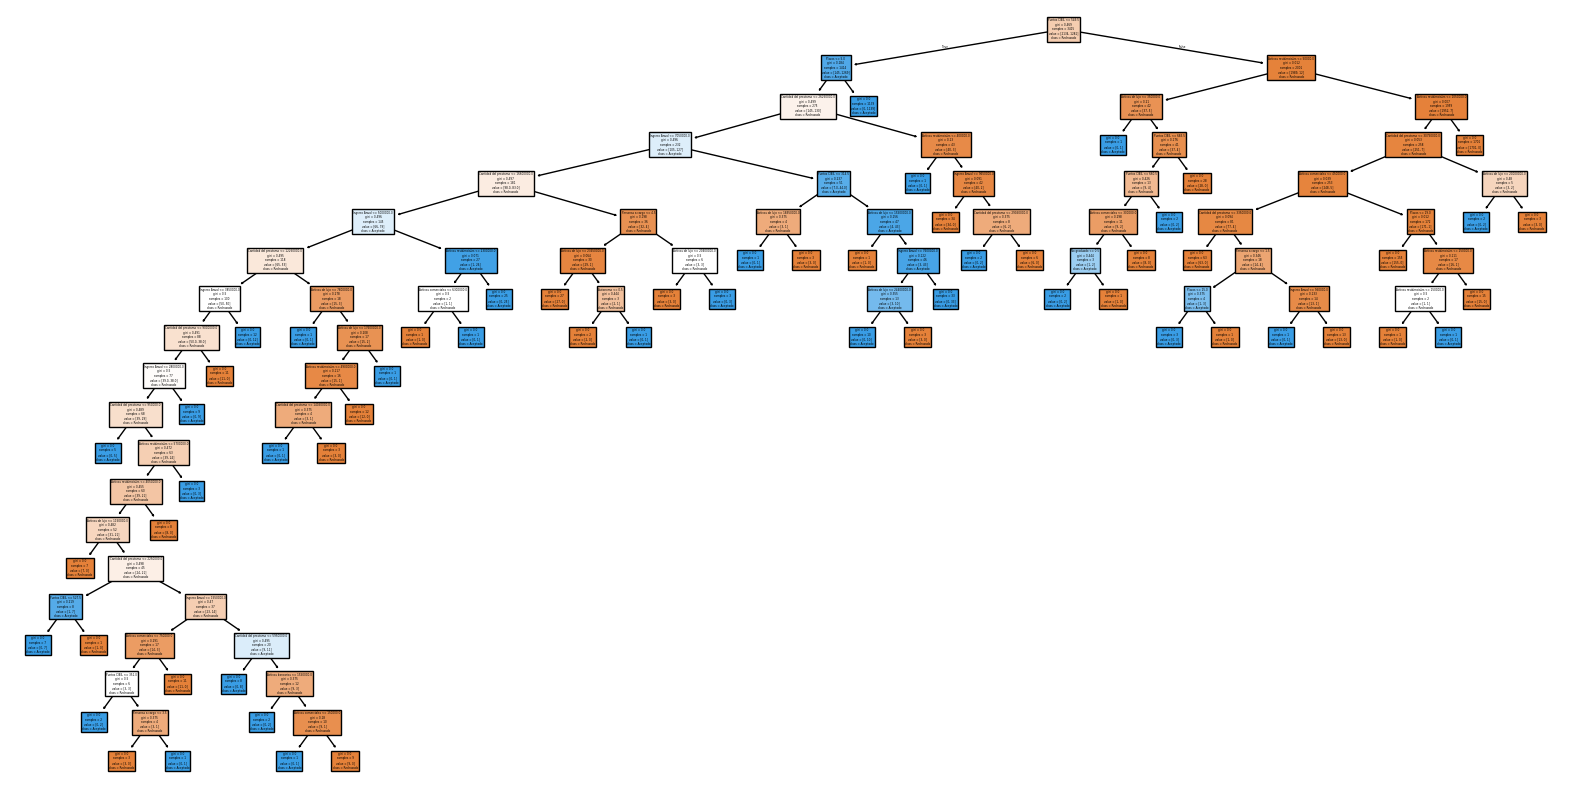

In [65]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree 
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix 

data= pd.read_csv('dataset_clean.csv') 

x= data.drop(columns= ['Prestamo rechazado']) #Columnas de entrada  
y= data['Prestamo rechazado'] #Columna de salida 
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.2, random_state=30) #Dividimos el dataset en un 80% de train y 20% de test 


arbol_decision= DecisionTreeClassifier(random_state=30)
arbol_decision.fit(x_train, y_train) #Entrenamos el modelo 
prediction= arbol_decision.predict(x_test) #Hacemos la prediccion de pertenecer a una clase 

print(f"Accuracy: {accuracy_score(y_test, prediction)}")  #Comprobamos la exactitud del modelo  


plt.figure(figsize=(20, 10))
plot_tree(arbol_decision, feature_names=x.columns, class_names=['Rechazado', 'Aceptado'], filled= True)

plt.savefig('arbol1.png')  # Guardar la imagen
plt.show()


Volvemos a hacer la prueba, pero añadiendo entropía

Prediccion: [1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0.
 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1.
 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1.
 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0.
 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0.
 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.

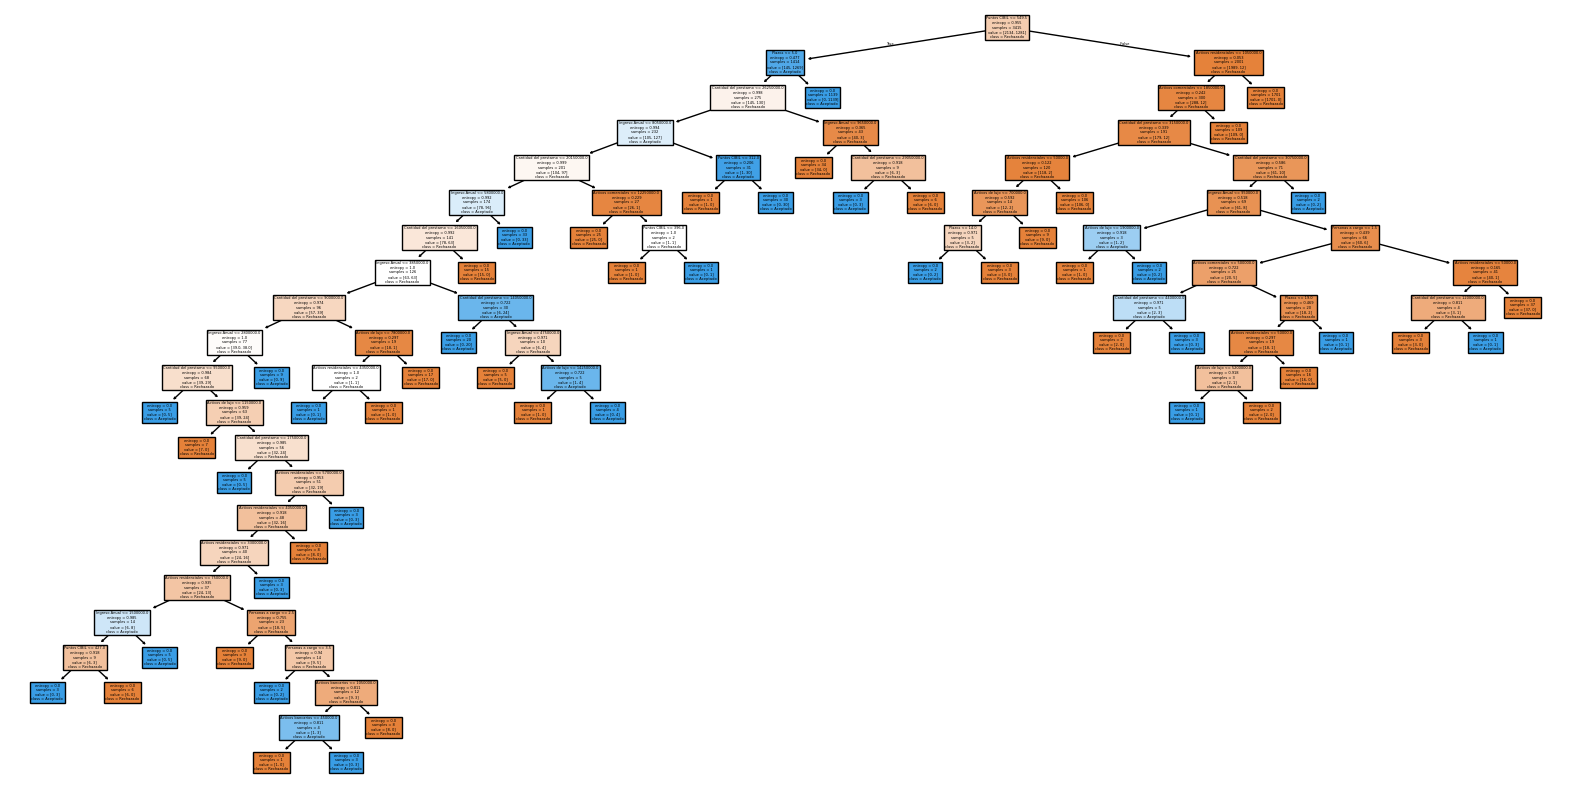

In [66]:
arbol_decision= DecisionTreeClassifier(criterion='entropy', random_state=30)

arbol_decision.fit(x_train, y_train) #Entrenamos el modelo 
prediction= arbol_decision.predict(x_test) #Hacemos la prediccion 
print(f"Prediccion: {prediction}") #En la consola sale la prediccion de todos los casos 
print(f"Test: {y_test}")

#Comprobar la exactitud 
print("Accuracy:",accuracy_score(y_test, prediction))

plt.figure(figsize=(20,10)) 
plot_tree(arbol_decision, feature_names=x.columns, class_names=['Rechazado', 'Aceptado'], filled= True)
plt.savefig('arbol2.png')

Genera un resultado un pelín mejor que el anterior. Además, la imagen generada del árbol es mucho más clara 

<img src= "arbol1.png" alt="Primer modelo" height= 600 weight= 300>










<img src= "arbol2.png" alt="Segundo modelo" height= 600 weight= 300>  

### Random Forest 


La principal diferencia es que genera mejores resultados que un arbol de decisión normal. 

In [67]:
from sklearn.ensemble import RandomForestClassifier  

data = pd.read_csv('dataset_clean.csv')

x = data.drop(columns=['Prestamo rechazado']) 
y = data['Prestamo rechazado'] 
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.2, random_state=36)

parametros_tuning= {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'criterion': ['gini', 'entropy'], 
    'min_samples_leaf': [1,2,4] 
}
bosque_random= RandomForestClassifier( )

#Para encontrar los mejores hiperparametros
mejor_tuning= RandomizedSearchCV(bosque_random, param_distributions=parametros_tuning, n_iter=5, cv= 3) 

mejor_tuning.fit(x_train, y_train) #Entrenamos el modelo 

mejor_bosque= mejor_tuning.best_estimator_

prediccion= mejor_bosque.predict(x_test) #Se hace la prediccion 

print(f"Prediccion", prediccion) 

#Calcular el score (accuracy) 

accuracy= accuracy_score(y_test, prediction)

print("Accuracy: ", accuracy)

Prediccion [0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1.
 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.
 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1.
 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1.
 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 

### Support Vector Machine (SVM) 

Carga de datos.

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('dataset_clean.csv')

X = df.drop('Prestamo rechazado', axis=1)
y = df['Prestamo rechazado']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar características numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Creación y entrenamiento del modelo SVM con kernel RBF y linear.

In [69]:
svm_model_liner = SVC(kernel='linear', C=1.0, gamma='scale', random_state=42)
svm_model_liner.fit(X_train_scaled, y_train)

y_pred_linear = svm_model_liner.predict(X_test_scaled)

svm_model_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model_rbf.fit(X_train_scaled, y_train)

y_pred_rbf = svm_model_rbf.predict(X_test_scaled)

Evaluación de resultados linear.

Accuracy: 0.9168618266978923
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.92      0.93       536
         1.0       0.88      0.91      0.89       318

    accuracy                           0.92       854
   macro avg       0.91      0.91      0.91       854
weighted avg       0.92      0.92      0.92       854



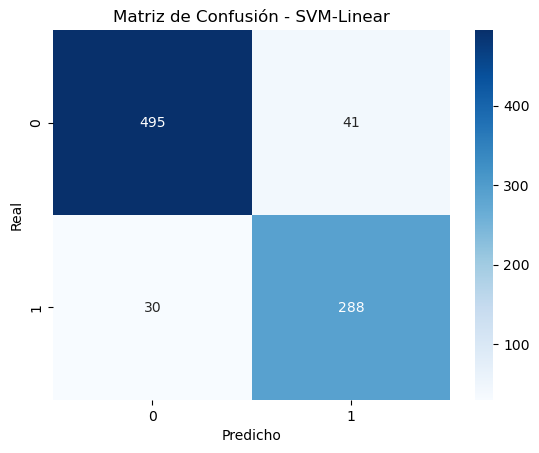

In [70]:
print("Accuracy:", accuracy_score(y_test, y_pred_linear))
print("Classification Report:\n", classification_report(y_test, y_pred_linear))

cm = confusion_matrix(y_test, y_pred_linear)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - SVM-Linear')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()


Verdaderos negativos (495): Préstamos aprobados correctamente clasificados.

Falsos positivos (41): Préstamos aprobados que el modelo predijo como rechazados.

Falsos negativos (30): Préstamos rechazados que el modelo predijo como aprobados.

Verdaderos positivos (288): Préstamos rechazados correctamente clasificados.

Evaluación de resultados rbf.

Accuracy: 0.9238875878220141
Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.93      0.94       536
         1.0       0.88      0.92      0.90       318

    accuracy                           0.92       854
   macro avg       0.92      0.92      0.92       854
weighted avg       0.92      0.92      0.92       854



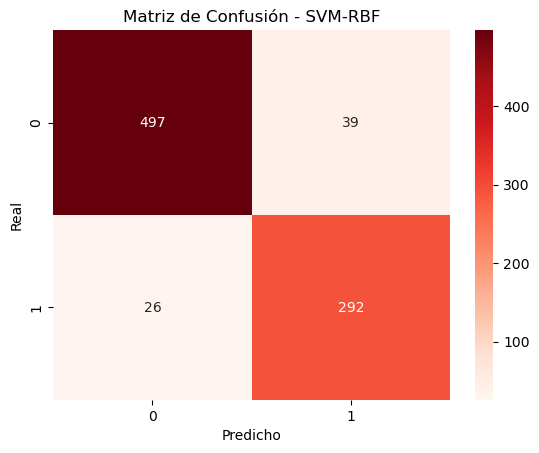

In [71]:
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("Classification Report:\n", classification_report(y_test, y_pred_rbf))

cm = confusion_matrix(y_test, y_pred_rbf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Matriz de Confusión - SVM-RBF')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

### Red de neuronas

Iteration 1, loss = 0.47275433
Validation score: 0.929825
Iteration 2, loss = 0.24565649
Validation score: 0.944444
Iteration 3, loss = 0.21069439
Validation score: 0.961988
Iteration 4, loss = 0.19649417
Validation score: 0.956140
Iteration 5, loss = 0.18323316
Validation score: 0.956140
Iteration 6, loss = 0.17553190
Validation score: 0.953216
Iteration 7, loss = 0.16418814
Validation score: 0.956140
Iteration 8, loss = 0.15820998
Validation score: 0.953216
Iteration 9, loss = 0.14958408
Validation score: 0.953216
Iteration 10, loss = 0.14252572
Validation score: 0.947368
Iteration 11, loss = 0.13756231
Validation score: 0.941520
Iteration 12, loss = 0.13337424
Validation score: 0.947368
Iteration 13, loss = 0.12507571
Validation score: 0.950292
Iteration 14, loss = 0.11748417
Validation score: 0.956140
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.

Exactitud en test: 0.9438
AUC en test: 0.9782

Informe de clasificación:
              pr

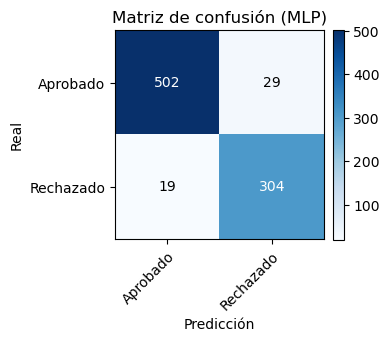

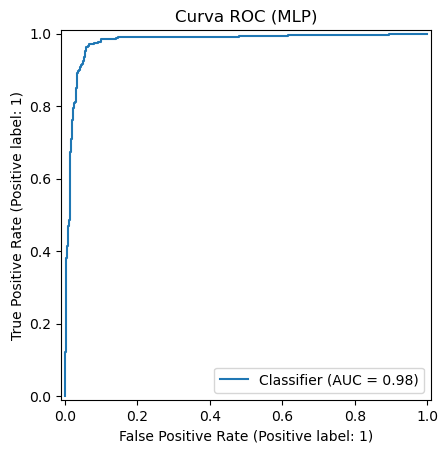


Modelo y escalador guardados en disco.


In [72]:

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    RocCurveDisplay,
)
from sklearn.neural_network import MLPClassifier

# %% 1. Cargar los datos
df = pd.read_csv('dataset_clean.csv')

# %% 2. Definir variables predictoras (X) y objetivo (y)
TARGET = 'Prestamo rechazado'  # columna objetivo (1 = rechazado, 0 = aprobado)
X = df.drop(columns=[TARGET])
y = df[TARGET].astype(int)

# %% 3. Dividir en entrenamiento y prueba (estratificado)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y,
)

# %% 4. Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# %% 5. Construir y entrenar la red neuronal (MLPClassifier)
mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),   # dos capas ocultas: 64 y 32 neuronas
    activation='relu',
    solver='adam',
    alpha=1e-4,                   # L2
    batch_size=32,
    learning_rate_init=1e-3,
    max_iter=500,
    early_stopping=True,          # validación interna y parada temprana
    n_iter_no_change=10,
    random_state=42,
    verbose=True,
)

mlp.fit(X_train_scaled, y_train)

# %% 6. Evaluar en el conjunto de prueba
# Probabilidades predichas
y_pred_prob = mlp.predict_proba(X_test_scaled)[:, 1]
# Etiquetas predichas
y_pred = mlp.predict(X_test_scaled)

# Métricas
acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)
cm = confusion_matrix(y_test, y_pred)

print(f"\nExactitud en test: {acc:.4f}")
print(f"AUC en test: {auc:.4f}\n")
print("Informe de clasificación:")
print(classification_report(y_test, y_pred, target_names=['Aprobado', 'Rechazado']))

# %% 7. Matriz de confusión
afig, ax = plt.subplots(figsize=(4, 4))
im = ax.imshow(cm, cmap='Blues')
ax.figure.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
classes = ['Aprobado', 'Rechazado']
ax.set_xticks(np.arange(len(classes)))
ax.set_yticks(np.arange(len(classes)))
ax.set_xticklabels(classes)
ax.set_yticklabels(classes)
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha='center', va='center',
                color='white' if cm[i, j] > cm.max() / 2. else 'black')
ax.set_ylabel('Real')
ax.set_xlabel('Predicción')
ax.set_title('Matriz de confusión (MLP)')
plt.tight_layout()
plt.show()

# %% 8. Curva ROC
RocCurveDisplay.from_predictions(y_test, y_pred_prob)
plt.title('Curva ROC (MLP)')
plt.show()

# %% 9. Guardar modelo y escalador para despliegue
import joblib
joblib.dump(mlp, 'modelo_mlp_prestamo.pkl')
joblib.dump(scaler, 'scaler_prestamo.pkl')

print('\nModelo y escalador guardados en disco.')

# Conclusiones  
Conclusiones sacadas del estudio